MEMBACA DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfmhs = pd.read_csv('nilaimahasiswa.csv', sep=';',engine='python')

In [3]:
dfmhs.describe()

,uts,uas
count,50.000000,50.000000
mean,56.220000,60.960000
std,27.316953,25.235996
min,12.000000,0.000000
25%,30.250000,45.000000
50%,55.000000,56.000000
75%,71.500000,81.000000
max,100.000000,100.000000


In [4]:
dfmhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mahasiswa  50 non-null     object
 1   uts        50 non-null     int64 
 2   uas        50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


Text(0.5, 1.0, 'Grafik Mahasiswa')

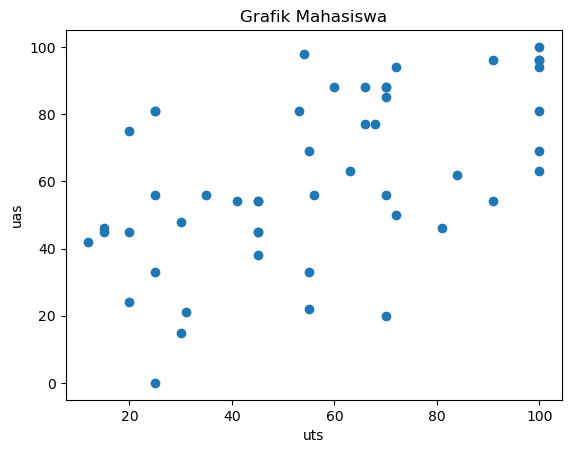

In [5]:
plt.scatter(dfmhs['uts'], dfmhs['uas'])
plt.xlabel('uts')
plt.ylabel('uas')
plt.title('Grafik Mahasiswa')

MEMBUAT DATA TRAINING

In [6]:
x_train = dfmhs[['uts','uas']].values

FEATURING SCALING

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)

In [8]:
x_train

array([[0.03409091, 0.46      ],
       [0.61363636, 0.77      ],
       [0.14772727, 0.33      ],
       [0.46590909, 0.81      ],
       [0.09090909, 0.75      ],
       [1.        , 0.94      ],
       [0.48863636, 0.69      ],
       [0.14772727, 0.56      ],
       [0.14772727, 0.81      ],
       [0.20454545, 0.48      ],
       [0.03409091, 0.45      ],
       [0.78409091, 0.46      ],
       [0.63636364, 0.77      ],
       [0.68181818, 0.5       ],
       [0.5       , 0.56      ],
       [0.57954545, 0.63      ],
       [1.        , 0.69      ],
       [0.26136364, 0.56      ],
       [0.48863636, 0.33      ],
       [0.21590909, 0.21      ],
       [0.48863636, 0.22      ],
       [0.65909091, 0.85      ],
       [0.20454545, 0.15      ],
       [0.14772727, 0.81      ],
       [0.        , 0.42      ],
       [0.09090909, 0.24      ],
       [0.68181818, 0.94      ],
       [0.14772727, 0.        ],
       [0.89772727, 0.54      ],
       [0.54545455, 0.88      ],
       [0.

CLUSTER

In [9]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2, n_init=10, random_state=0)
kmean

KMeans(n_clusters=2, n_init=10, random_state=0)

In [10]:
y_cluster = kmean.fit_predict(x_train)
y_cluster

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0], dtype=int32)

In [11]:
dfmhs['Cluster'] = y_cluster
dfmhs

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,1
1,ARFENDO,66,77,0
2,LATIFUDIN,25,33,1
3,HENDI,53,81,0
4,M. FERYAN,20,75,1
5,RENDI,100,94,0
6,NUREKA,55,69,0
7,INDRA,25,56,1
8,MOCH IDWAL,25,81,1
9,REYNO YUSUF,30,48,1


In [12]:
kmean.cluster_centers_

array([[0.75272727, 0.7836    ],
       [0.25227273, 0.4356    ]])

VISUALISASI DATA HASIL CLUSTERING

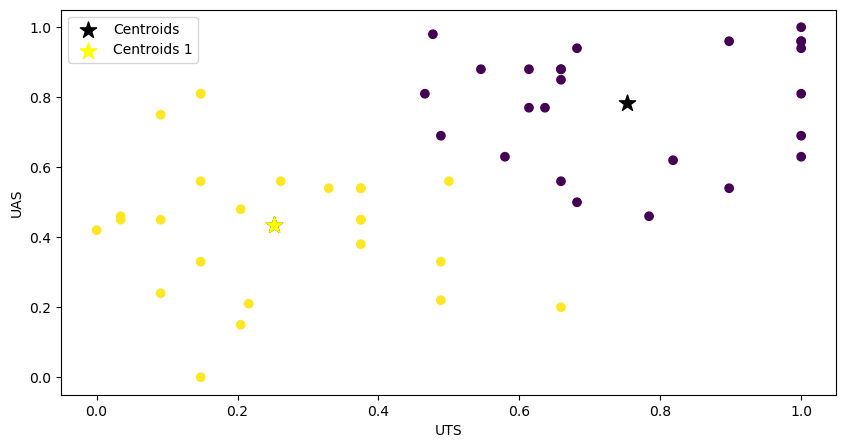

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0],x_train[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:, 1], marker='*', s=150, label='Centroids', color='black')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1, 1], marker='*', s=150, label='Centroids 1', color='yellow')
# plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2, 1], marker='*', s=150, label='Centroids 2', color='red')
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.legend()

MENCARI K (jumlah cluster) TERBAIK

In [14]:
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k,n_init=10,random_state=0).fit(x_train)
    inertias.append(km.inertia_)

In [15]:
inertias

[7.842257805785124,
 3.197773404958678,
 2.4684136899500597,
 1.7787095563590452,
 1.2978927139802348,
 0.9765287814016792,
 0.7696004897186147,
 0.5653348005214482,
 0.43637727567886664]

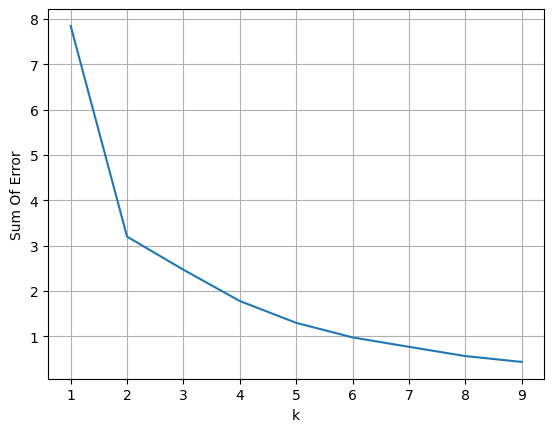

In [16]:
plt.xlabel("k")
plt.ylabel("Sum Of Error")
plt.plot(k_range, inertias[:9])
plt.grid()

MEMBUAT DATASET BARU DENGAN LABEL CLUSTER

In [17]:
dfmhs['Cluster'] = dfmhs['Cluster'].replace([0,1],['Kurang','Baik'])

In [18]:
dfmhs

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,Baik
1,ARFENDO,66,77,Kurang
2,LATIFUDIN,25,33,Baik
3,HENDI,53,81,Kurang
4,M. FERYAN,20,75,Baik
5,RENDI,100,94,Kurang
6,NUREKA,55,69,Kurang
7,INDRA,25,56,Baik
8,MOCH IDWAL,25,81,Baik
9,REYNO YUSUF,30,48,Baik
